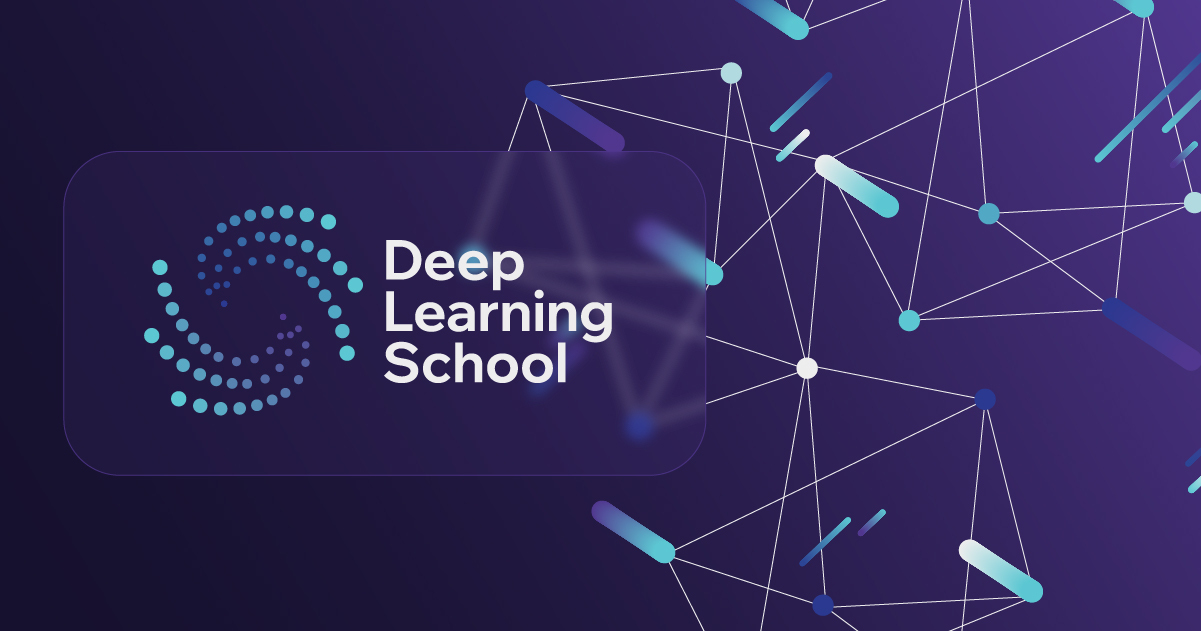

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

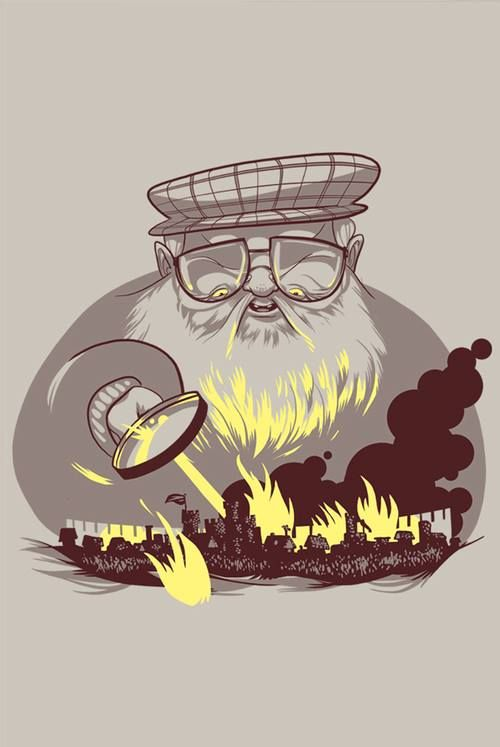

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 74.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 73.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
train = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
train

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [5]:
test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<BarContainer object of 24 artists>

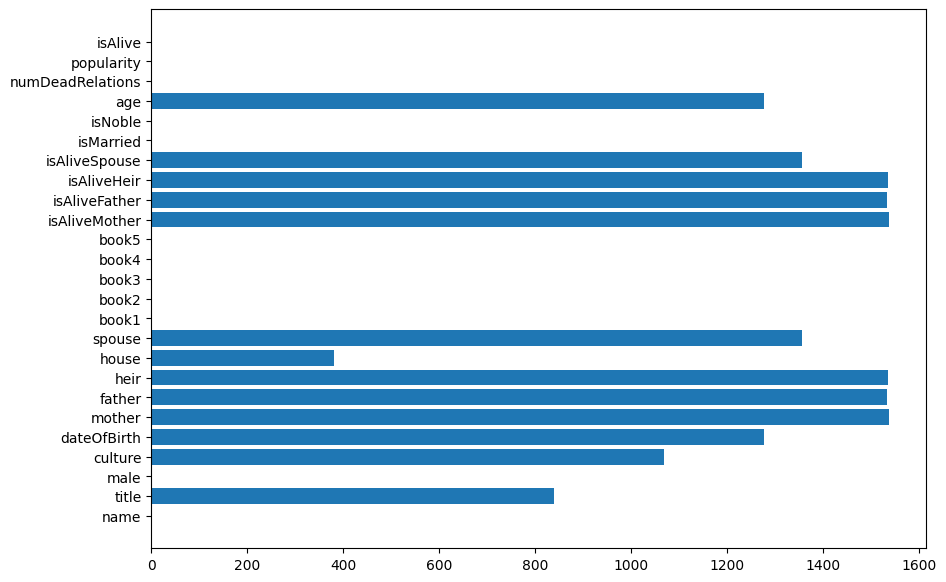

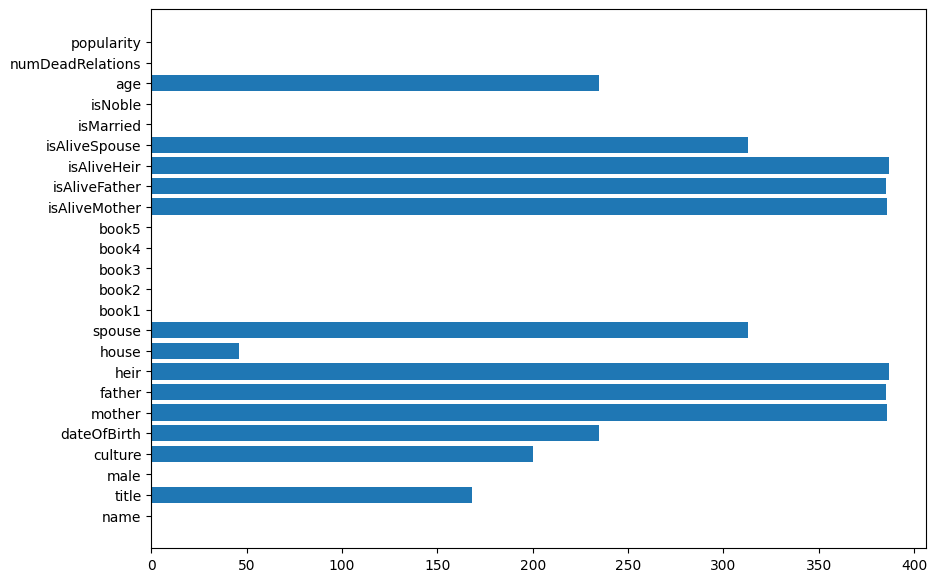

In [6]:
# Определяем количество незаполненных данных(NaN) по колонкам в датасете train
nansum = train.isna().sum(axis=0)
# Визуализиуем на гистограмме
plt.figure(figsize=(10,7))
plt.barh(nansum.index, nansum.values)

# Определяем количество незаполненных данных(NaN) по колонкам в датасете test
nansum = test.isna().sum(axis=0)
# Визуализиуем на гистограмме
plt.figure(figsize=(10,7))
plt.barh(nansum.index, nansum.values)

Пропущенные значения в train:
name                   0
title                840
male                   0
culture             1069
dateOfBirth            0
house                381
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isMarried              0
isNoble                0
age                    0
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

Пропущенные значения в test:
name                  0
title               168
male                  0
culture             200
dateOfBirth           0
house                46
book1                 0
book2                 0
book3                 0
book4                 0
book5                 0
isMarried             0
isNoble               0
age                   0
numDeadRelations      0
popularity            0
dtype: int64


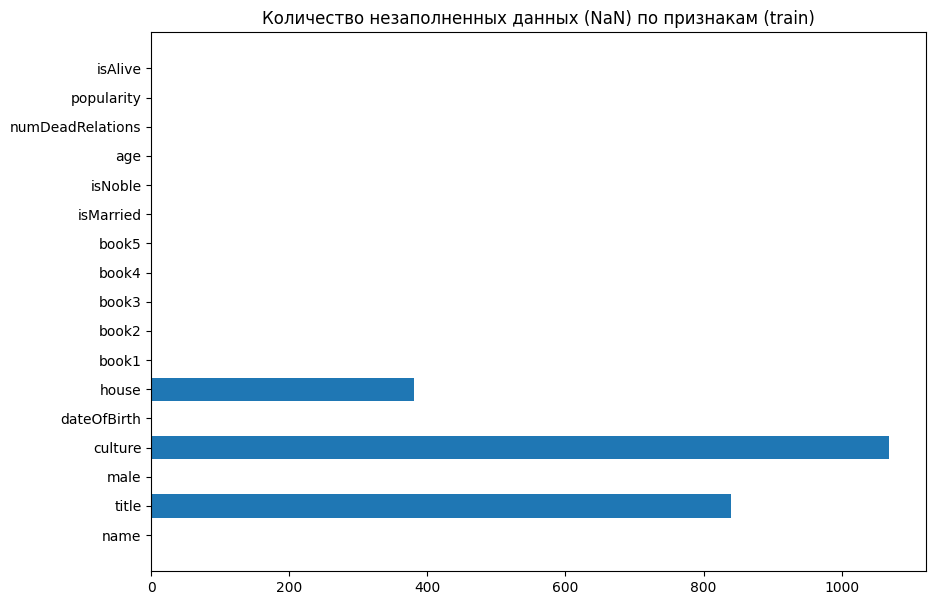

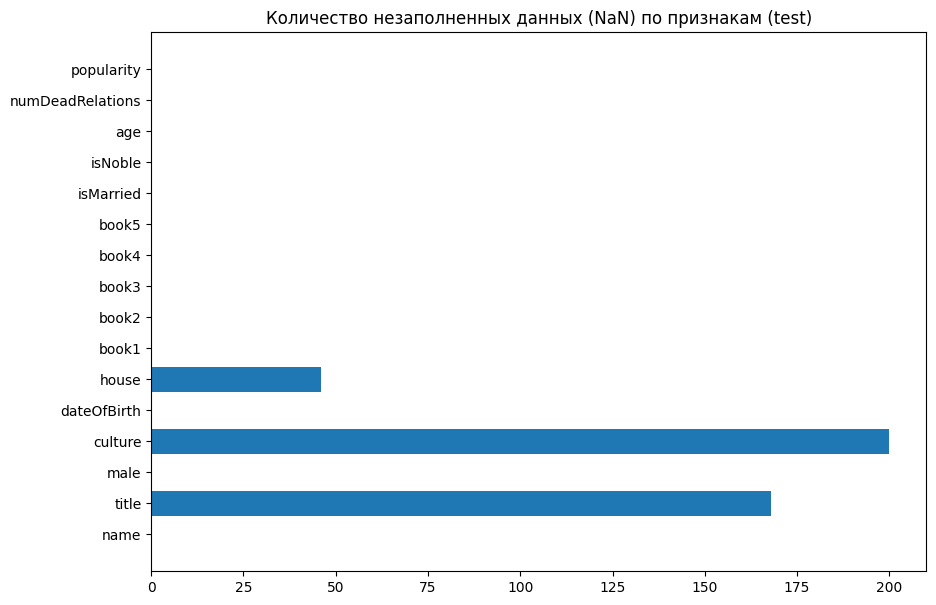

In [7]:
# 1. Удаление колонок с большим количеством пропусков и мало заполнены
columns_to_drop = ['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

# 2. Заполнение пропущенных значений в колонке age (на основе train)
medianAge = np.quantile(train['age'].dropna().values, q=0.5)
train['age'] = train['age'].fillna(medianAge)
test['age'] = test['age'].fillna(medianAge)  # Используем медиану из train

# 3. Заполнение пропущенных значений в колонке dateOfBirth (на основе train)
medianDOB = np.quantile(train['dateOfBirth'].dropna().values, q=0.5)
train['dateOfBirth'] = train['dateOfBirth'].fillna(medianDOB)
test['dateOfBirth'] = test['dateOfBirth'].fillna(medianDOB)  # Используем медиану из train

# 4. Проверка пропущенных значений после преобразований
print("Пропущенные значения в train:")
print(train.isna().sum())
print("\nПропущенные значения в test:")
print(test.isna().sum())

# 5. Визуализация пропущенных значений (опционально)
nansum_train = train.isna().sum(axis=0)
nansum_test = test.isna().sum(axis=0)

plt.figure(figsize=(10, 7))
plt.title("Количество незаполненных данных (NaN) по признакам (train)")
plt.barh(nansum_train.index, nansum_train.values)
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Количество незаполненных данных (NaN) по признакам (test)")
plt.barh(nansum_test.index, nansum_test.values)
plt.show()

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [8]:
# Создания признака idPopular
# 0: popularity < 0.5, 1: popularity >= 0.5, записываем в новую колонку isPopular
train['isPopular'] = np.where(train['popularity'] >= 0.5, 1, 0)
test['isPopular'] = np.where(test['popularity'] >= 0.5, 1, 0)

In [9]:
# Создания признака boolDeadRelations
train['boolDeadRelations'] = np.where(train['numDeadRelations'] > 0, 1, 0)
test['boolDeadRelations'] = np.where(test['numDeadRelations'] > 0, 1, 0)

In [10]:
# Упрашение признака culture
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
# Функция для замены значений в колонке culture
def simplify_culture(value):
    for main_culture, variants in cult.items():
        if value in variants:
            return main_culture
    return value  # Если значение не найдено, оставляем как есть

# Применяем функцию к train и test
train['culture'] = train['culture'].apply(simplify_culture)
test['culture'] = test['culture'].apply(simplify_culture)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Распределение классов в целевой переменной isAlive:
isAlive
1    1212
0     345
Name: count, dtype: int64


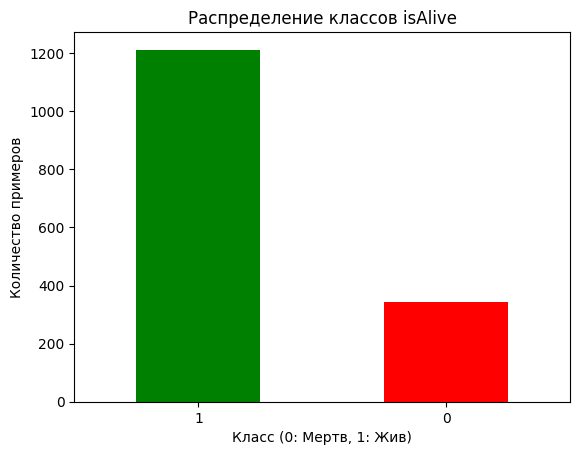

In [11]:
# 1. Посчитаем количество примеров для каждого класса
class_distribution = train['isAlive'].value_counts()
print("Распределение классов в целевой переменной isAlive:")
print(class_distribution)

# 2. Визуализируем распределение классов
# зеленые живые красные мертвые
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.title("Распределение классов isAlive")
plt.xlabel("Класс (0: Мертв, 1: Жив)")
plt.ylabel("Количество примеров")
plt.xticks(rotation=0)
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [12]:
# Обрабатываем title в train и test
title_counts = train['title'].value_counts()
rare_titles = title_counts[title_counts < 50].index
train.loc[train['title'].isin(rare_titles), 'title'] = 'Other'  # Обновляем title в train
train['title'] = train['title'].fillna('Other')  # Заполняем пропущенные title

# Считаем процент выживших по title (только для train)
percent_alive = train.groupby('title')['isAlive'].mean() * 100

# Добавляем процент выживших
train['percentAliveInTitle'] = train['title'].map(percent_alive)

# Заполняем пропуски средним значением по train
train['percentAliveInTitle'] = train['percentAliveInTitle'].fillna(train['isAlive'].mean() * 100)

# Удаляем title
train = train.drop(columns=['title'])

# Обрабатываем test
test['title'] = test['title'].replace(rare_titles, 'Other')  # Используем редкие значения из train
test['title'] = test['title'].fillna('Other')  # Заполняем пропущенные title

# Добавляем процент выживших, рассчитанный по train
test['percentAliveInTitle'] = test['title'].map(percent_alive)

# Заполняем пропуски средним значением из train
test['percentAliveInTitle'] = test['percentAliveInTitle'].fillna(train['isAlive'].mean() * 100)

# Удаляем title
test = test.drop(columns=['title'])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1557 non-null   object 
 1   male                 1557 non-null   int64  
 2   culture              488 non-null    object 
 3   dateOfBirth          1557 non-null   float64
 4   house                1176 non-null   object 
 5   book1                1557 non-null   int64  
 6   book2                1557 non-null   int64  
 7   book3                1557 non-null   int64  
 8   book4                1557 non-null   int64  
 9   book5                1557 non-null   int64  
 10  isMarried            1557 non-null   int64  
 11  isNoble              1557 non-null   int64  
 12  age                  1557 non-null   float64
 13  numDeadRelations     1557 non-null   int64  
 14  popularity           1557 non-null   float64
 15  isAlive              1557 non-null   int64 

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 389 non-null    object 
 1   male                 389 non-null    int64  
 2   culture              189 non-null    object 
 3   dateOfBirth          389 non-null    float64
 4   house                343 non-null    object 
 5   book1                389 non-null    int64  
 6   book2                389 non-null    int64  
 7   book3                389 non-null    int64  
 8   book4                389 non-null    int64  
 9   book5                389 non-null    int64  
 10  isMarried            389 non-null    int64  
 11  isNoble              389 non-null    int64  
 12  age                  389 non-null    float64
 13  numDeadRelations     389 non-null    int64  
 14  popularity           389 non-null    float64
 15  isPopular            389 non-null    int6

In [15]:
from sklearn.preprocessing import LabelEncoder

def process_house(data, percent_alive=None):
    # Заполнение пропусков в 'house' на основе фамилии из 'name'
    data['house'] = data['house'].fillna(data['name'].apply(lambda x: 'House ' + x.split()[-1] if len(x.split()) > 1 else 'Other'))

    # Заменяем редкие значения в 'house' на 'Other'
    house_counts = data['house'].value_counts()
    data['house'] = data['house'].apply(lambda x: x if house_counts.get(x, 0) >= 30 else 'Other')

    # Если передан словарь процентного выживания, используем его, иначе вычисляем
    if percent_alive is None:
        percent_alive = data.groupby('house')['isAlive'].mean() * 100

    data['percentAliveInHouse'] = data['house'].map(percent_alive)

    # Удаляем 'house' колонку
    data.drop(columns=['house'], inplace=True)

    return data, percent_alive

# Обрабатываем train и сохраняем процент выживших
train, percent_alive_train = process_house(train)

# Обрабатываем test, используя проценты из train
test, _ = process_house(test, percent_alive=percent_alive_train)

# Проверка
print(train[['percentAliveInHouse']].head())
print(test[['percentAliveInHouse']].head())


      percentAliveInHouse
S.No                     
1               22.222222
2               89.010989
3               81.395349
4               81.395349
5               81.395349
      percentAliveInHouse
S.No                     
1558            81.395349
1559            81.395349
1560            81.395349
1561            81.395349
1562            81.395349


In [16]:
train.isna().sum(axis=0)

,0
name,0
male,0
culture,1069
dateOfBirth,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0


In [17]:
test.isna().sum(axis=0)

,0
name,0
male,0
culture,200
dateOfBirth,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0


In [18]:
# Обработаем признак name в train
# Создадим признак, содержащий длину имени
train['namelen'] = train['name'].apply(len)
train.drop(columns=['name'], inplace = True)

# Обработаем признак name в test
# Создадим признак, содержащий длину имени
test['namelen'] = test['name'].apply(len)
test.drop(columns=['name'], inplace = True)

In [19]:
# culture
# Обрабатываем с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
train['cultureNum'] = label_encoding.fit_transform(train['culture'])

# Удаляем culture
train.drop(columns=['culture'], inplace = True)


#  culture
# Обрабатываем с помощью LabelEncoder

label_encoding = LabelEncoder()
test['cultureNum'] = label_encoding.fit_transform(test['culture'])

# Удаляем culture
test.drop(columns=['culture'], inplace = True)


In [20]:
train.isna().sum(axis=0)

,0
male,0
dateOfBirth,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0
age,0


In [21]:
test.isna().sum(axis=0)


,0
male,0
dateOfBirth,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0
age,0


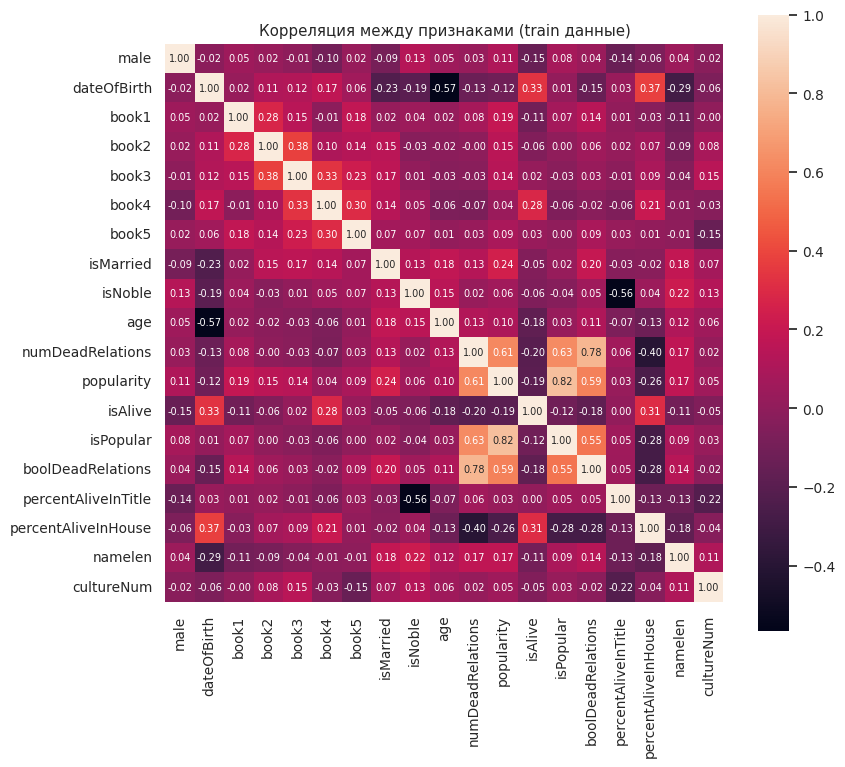

In [22]:
# корреляция в train
corrmat = train.corr()
cm = np.corrcoef(train.values.T)
sns.set(font_scale=0.9)
plt.figure(figsize=(9, 8))
plt.title("Корреляция между признаками (train данные)")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f',annot_kws={'size':7}, yticklabels=train.columns.values, xticklabels=train.columns.values)
plt.show()

In [23]:
train.drop(columns=['isNoble'], inplace = True) # бесполезный
train.drop(columns=['isPopular'], inplace = True) # удаляем из-за корреляции
train.drop(columns=['boolDeadRelations'], inplace = True) # удаляем из-за корреляции
train.drop(columns=['percentAliveInHouse'], inplace=True) # коррелируется ни с одним другим признаком

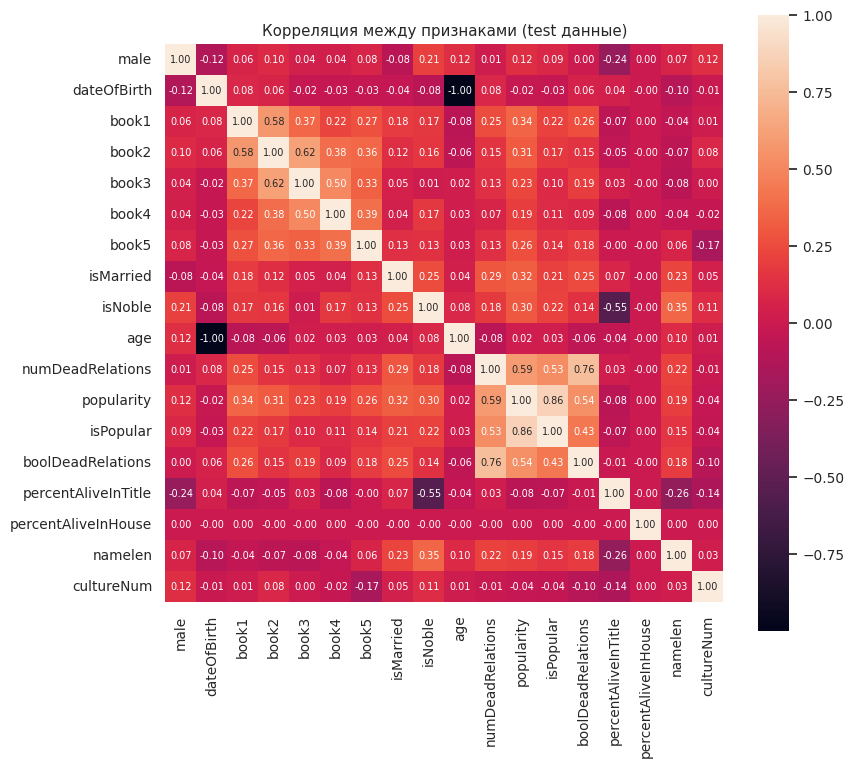

In [24]:
# корреляция на test

corrmat = test.corr()
cm = np.corrcoef(test.values.T)
sns.set(font_scale=0.9)
plt.figure(figsize=(9, 8))
plt.title("Корреляция между признаками (test данные)")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f',annot_kws={'size':7}, yticklabels=test.columns.values, xticklabels=test.columns.values)
plt.show()

In [25]:
test.drop(columns=['isNoble'], inplace = True) # бесполезный
test.drop(columns=['isPopular'], inplace = True) # удаляем из-за корреляции
test.drop(columns=['boolDeadRelations'], inplace = True) # удаляем из-за корреляции
test.drop(columns=['percentAliveInHouse'], inplace=True) # коррелируется ни с одним другим признаком

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

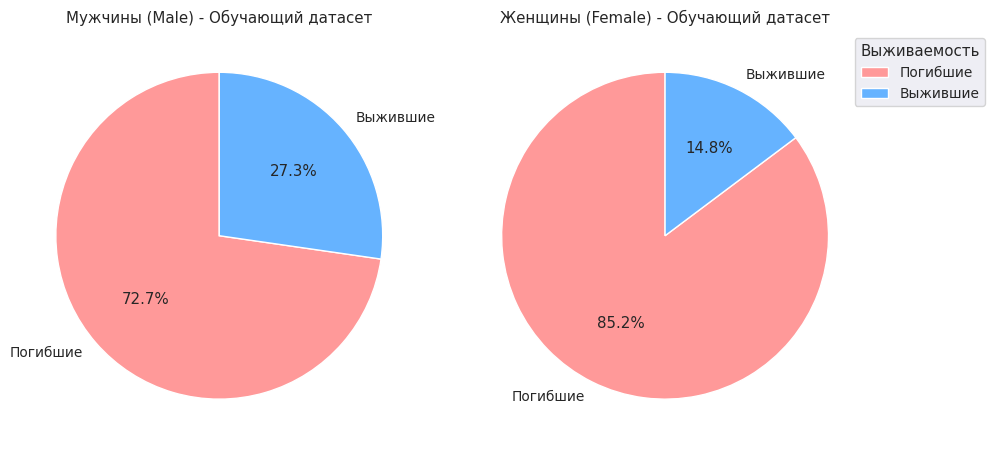

In [26]:
# Разделил данные на две группу выжившие и погибшие
# Функция для построения круговых диаграмм
def plot_survival_by_gender(data, title):
    # Фильтрация данных по полу
    data1 = data.loc[(data.male == 1)]['isAlive'].value_counts()
    data2 = data.loc[(data.male == 0)]['isAlive'].value_counts()

    # Создание фигуры с двумя областями для графиков
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

    # Круговая диаграмма для мужчин
    ax1.pie(
        data1.values,
        labels=['Погибшие', 'Выжившие'],  # Подписи для частей диаграммы
        autopct='%1.1f%%',                # Проценты на диаграмме
        colors=['#ff9999', '#66b3ff'],    # Цвета для частей диаграммы
        startangle=90                      # Начальный угол для лучшего отображения
    )
    ax1.set_title(f"Мужчины (Male) - {title}")

    # Круговая диаграмма для женщин
    ax2.pie(
        data2.values,
        labels=['Погибшие', 'Выжившие'],  # Подписи для частей диаграммы
        autopct='%1.1f%%',                # Проценты на диаграмме
        colors=['#ff9999', '#66b3ff'],    # Цвета для частей диаграммы
        startangle=90                      # Начальный угол для лучшего отображения
    )
    ax2.set_title(f"Женщины (Female) - {title}")

    # Добавление легенды
    plt.legend(title="Выживаемость", loc="upper right", bbox_to_anchor=(1.3, 1))

    # Отображение графиков
    plt.tight_layout()
    plt.show()

# Анализ для обучающего датасета
plot_survival_by_gender(train, "Обучающий датасет")

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   male                 1557 non-null   int64  
 1   dateOfBirth          1557 non-null   float64
 2   book1                1557 non-null   int64  
 3   book2                1557 non-null   int64  
 4   book3                1557 non-null   int64  
 5   book4                1557 non-null   int64  
 6   book5                1557 non-null   int64  
 7   isMarried            1557 non-null   int64  
 8   age                  1557 non-null   float64
 9   numDeadRelations     1557 non-null   int64  
 10  popularity           1557 non-null   float64
 11  isAlive              1557 non-null   int64  
 12  percentAliveInTitle  1557 non-null   float64
 13  namelen              1557 non-null   int64  
 14  cultureNum           1557 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 194.

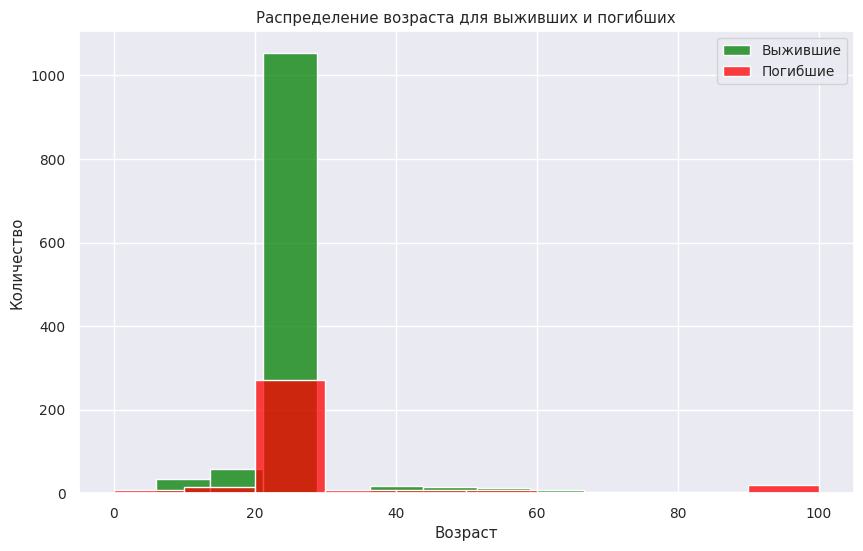

In [28]:
# Фильтрация данных для выживших и погибших
survived = train[train['isAlive'] == 1]['age']
not_survived = train[train['isAlive'] == 0]['age']

# Построение гистограмм
plt.figure(figsize=(10, 6))
sns.histplot(survived, color='green', label='Выжившие', kde=False)
sns.histplot(not_survived, color='red', label='Погибшие', kde=False)
plt.title('Распределение возраста для выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.show()

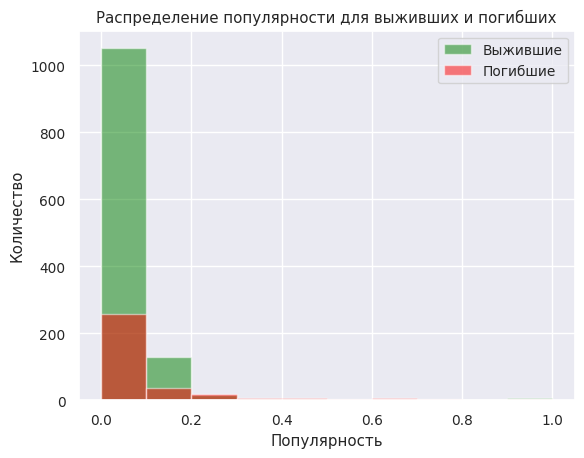

In [29]:
# Построение гистограмм
plt.hist(train.loc[(train.isAlive == 1)]['popularity'], alpha=0.5, color='green', label='Выжившие')
plt.hist(train.loc[(train.isAlive == 0)]['popularity'], alpha=0.5, color='red', label='Погибшие')

# Добавление легенды, подписей и заголовка
plt.legend()
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.title('Распределение популярности для выживших и погибших')
plt.show()

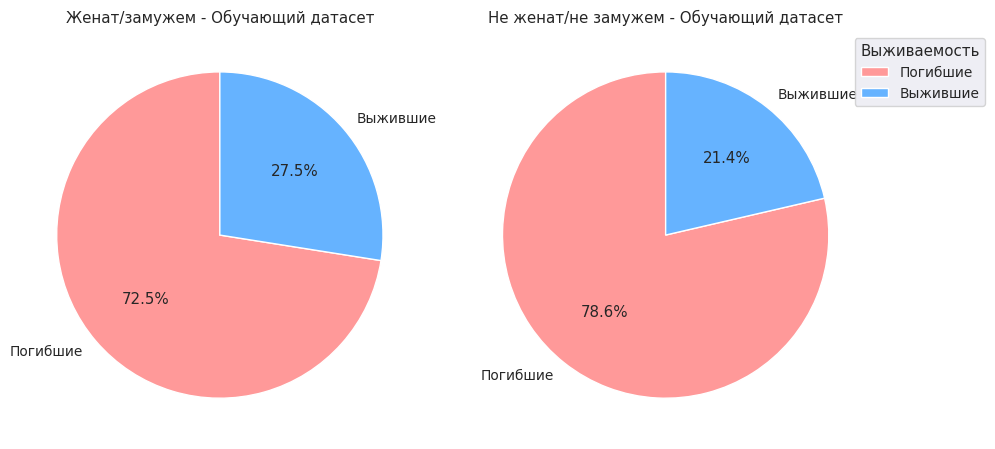

In [30]:
# Функция для построения круговых диаграм для женатых/замужем и не женатых/не заумежем
def plot_survival_by_marriage(data, title):
    # Фильтрация данных по семейному положению
    data1 = data.loc[(data.isMarried == 1)]['isAlive'].value_counts()  # Женат/замужем
    data2 = data.loc[(data.isMarried == 0)]['isAlive'].value_counts()  # Не женат/не замужем

    # Создание фигуры с двумя областями для графиков
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

    # Круговая диаграмма для женатых/замужних
    ax1.pie(
        data1.values,
        labels=['Погибшие', 'Выжившие'],  # Подписи для частей диаграммы
        autopct='%1.1f%%',                # Проценты на диаграмме
        colors=['#ff9999', '#66b3ff'],    # Цвета для частей диаграммы
        startangle=90                      # Начальный угол для лучшего отображения
    )
    ax1.set_title(f"Женат/замужем - {title}")

    # Круговая диаграмма для неженатых/незамужних
    ax2.pie(
        data2.values,
        labels=['Погибшие', 'Выжившие'],  # Подписи для частей диаграммы
        autopct='%1.1f%%',                # Проценты на диаграмме
        colors=['#ff9999', '#66b3ff'],    # Цвета для частей диаграммы
        startangle=90                      # Начальный угол для лучшего отображения
    )
    ax2.set_title(f"Не женат/не замужем - {title}")

    # Добавление легенды
    plt.legend(title="Выживаемость", loc="upper right", bbox_to_anchor=(1.3, 1))

    # Отображение графиков
    plt.tight_layout()
    plt.show()

# Анализ для обучающего датасета
plot_survival_by_marriage(train, "Обучающий датасет")

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [31]:
# для обучающего набора
X = train.drop(columns=['isAlive'])
y = train['isAlive']
# Для тестового набора
x_test = test

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   male                 1557 non-null   int64  
 1   dateOfBirth          1557 non-null   float64
 2   book1                1557 non-null   int64  
 3   book2                1557 non-null   int64  
 4   book3                1557 non-null   int64  
 5   book4                1557 non-null   int64  
 6   book5                1557 non-null   int64  
 7   isMarried            1557 non-null   int64  
 8   age                  1557 non-null   float64
 9   numDeadRelations     1557 non-null   int64  
 10  popularity           1557 non-null   float64
 11  isAlive              1557 non-null   int64  
 12  percentAliveInTitle  1557 non-null   float64
 13  namelen              1557 non-null   int64  
 14  cultureNum           1557 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 194.

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [42]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [43]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=1000)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# Шаг 2. обучение модели
logistic_regression.fit(X_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8365


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [45]:
# Пробуем делать предсказания на разных моделях

# AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy AdaBoostClassifier: %.4f" % accuracy)

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy RandomForestClassifier: %.4f" % accuracy)

# GaussianProcessClassifier
model = GaussianProcessClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy GaussianProcessClassifier: %.4f" % accuracy)

# GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy GaussianNB: %.4f" % accuracy)

# KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy KNeighborsClassifier: %.4f" % accuracy)

# SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVC: %.4f" % accuracy)

# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DecisionTreeClassifier: %.4f" % accuracy)

Accuracy AdaBoostClassifier: 0.8237
Accuracy RandomForestClassifier: 0.8365
Accuracy GaussianProcessClassifier: 0.8109
Accuracy GaussianNB: 0.8045
Accuracy KNeighborsClassifier: 0.8013
Accuracy SVC: 0.8301
Accuracy DecisionTreeClassifier: 0.7724


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [46]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [48]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [50]:
models = {
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gaussian Process": GaussianProcessClassifier(),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Словарь для хранения результатов
results = {}

for name, model in models.items():
    # 1. Обучение модели
    model.fit(X_train, y_train)

    # 2. Предсказание на тестовых данных
    y_pred = model.predict(X_test)

    # 3. Расчет accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # 4. Вывод результата
    print(f"{name:20} | Accuracy: {accuracy:.4f}")

# Находим лучшую модель
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]
print(f"\nЛучшая модель: {best_model_name} с Accuracy = {best_accuracy:.4f}")

AdaBoost             | Accuracy: 0.8237
Random Forest        | Accuracy: 0.8365
Gaussian Process     | Accuracy: 0.8109
Naive Bayes          | Accuracy: 0.8045
k-NN                 | Accuracy: 0.8013
SVM                  | Accuracy: 0.8301
Decision Tree        | Accuracy: 0.7821

Лучшая модель: Random Forest с Accuracy = 0.8365


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [56]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 6.96MB/s]


In [57]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [59]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy лучшей модели на тестовых данных: {accuracy:.4f}")

Accuracy лучшей модели на тестовых данных: 0.8365


In [63]:
y_pred = best_model.predict(test)
submission["isAlive"] = y_pred.astype(int)
print("\nПервые 5 предсказаний:")
print(submission.head())
print("\nРаспределение предсказаний:")
print(submission["isAlive"].value_counts(normalize=True))


Первые 5 предсказаний:
      isAlive
S.No         
1558        0
1559        1
1560        1
1561        1
1562        1

Распределение предсказаний:
isAlive
1    0.730077
0    0.269923
Name: proportion, dtype: float64


Как сохранить измененный Pandas DataFrame в csv файл:

In [66]:
submission.to_csv("/content/new_submission.csv", index=False)

In [67]:
print(submission.head())

      isAlive
S.No         
1558        0
1559        1
1560        1
1561        1
1562        1
